In [2]:
!pip install torch --quiet
!pip install torchaudio --quiet
!pip install tkintertable --quiet

!pip install soundfile --quiet
!pip install sounddevice --quiet

!pip install pyaudio --quiet
!pip install wave --quiet

!pip install matplotlib --quiet

In [1]:
import torch
import torchaudio
import tkinter as tk
from tkinter import *

import sounddevice as sd
import soundfile as sf


import pyaudio
import wave


import time
from typing import List

import IPython
import matplotlib.pyplot as plt
from torchaudio.models.decoder import ctc_decoder
from torchaudio.utils import download_asset


print(torch.__version__)
print(torchaudio.__version__)

1.13.1+cpu
0.13.1+cpu


In [2]:
sd.default.device = ("Microsoft Sound Mapper - Input, MME", "Microsoft Sound Mapper - Output, MME")

In [3]:
sd.query_devices()

>  0 Microsoft Sound Mapper - Input, MME (2 in, 0 out)
   1 Microphone Array (Realtek High , MME (2 in, 0 out)
<  2 Microsoft Sound Mapper - Output, MME (0 in, 2 out)
   3 Speakers (Realtek High Definiti, MME (0 in, 2 out)
   4 Primary Sound Capture Driver, Windows DirectSound (2 in, 0 out)
   5 Microphone Array (Realtek High Definition Audio), Windows DirectSound (2 in, 0 out)
   6 Primary Sound Driver, Windows DirectSound (0 in, 2 out)
   7 Speakers (Realtek High Definition Audio), Windows DirectSound (0 in, 2 out)
   8 FL Studio ASIO, ASIO (2 in, 2 out)
   9 Speakers (Realtek High Definition Audio), Windows WASAPI (0 in, 2 out)
  10 Microphone Array (Realtek High Definition Audio), Windows WASAPI (2 in, 0 out)
  11 Stereo Mix (Realtek HD Audio Stereo input), Windows WDM-KS (2 in, 0 out)
  12 Microphone Array (Realtek HD Audio Mic input), Windows WDM-KS (2 in, 0 out)
  13 Mic in at front panel (black) (Mic in at front panel (black)), Windows WDM-KS (2 in, 0 out)
  14 Speakers (Realte

In [39]:
import sys
import queue
import tempfile
import numpy as np
import sounddevice as sd
import soundfile as sf
assert np


q = queue.Queue()


def callback(indata, frames, time, status):
    """
    This is called from a separate thread for each audio block
    """
    if status:
        print(status, file=sys.stderr)
    q.put(indata.copy())


# Unique file name for every recording
filename = tempfile.mktemp(prefix='untitled_', suffix='.wav', dir='')
# Make sure the file is open before recording anything
with sf.SoundFile(filename, mode='x', samplerate=48000, channels=2) as file:
    with sd.InputStream(samplerate=48000, channels=2, callback=callback):
        print('#' * 80)
        print('press Ctrl+C to stop the recording')
        print('#' * 80)
        while True:
            file.write(q.get())

################################################################################
press Ctrl+C to stop the recording
################################################################################


KeyboardInterrupt: 

In [ ]:
import sys
import queue
import tempfile
import numpy as np
import sounddevice as sd
import soundfile as sf
assert np


q = queue.Queue()

running = False

def callback(indata, frames, time, status):
    """
    This is called from a separate thread for each audio block
    """
    if status:
        print(status, file=sys.stderr)
    q.put(indata.copy())



def start():
    global running

    if running is not False:
        print('already running')
    else:
        running = True
        # Unique file name for every recording
        filename = tempfile.mktemp(prefix='untitled_', suffix='.wav', dir='')
        # Make sure the file is open before recording anything
        with sf.SoundFile(filename, mode='x', samplerate=48000, channels=2) as file:
            with sd.InputStream(samplerate=48000, channels=2, callback=callback):
                print('#' * 80)
                print('press Ctrl+C to stop the recording')
                print('#' * 80)
                while (running):
                    file.write(q.get())

def stop():
    global running

    if running is not False:
        running = False
    else:
        print('not running')

root = tk.Tk()
root.geometry("100x200")

button_rec = tk.Button(root, text='Start', command=start)
button_rec.pack()

button_stop = tk.Button(root, text='Stop', command=stop)
button_stop.pack()

root.mainloop() 

################################################################################
press Ctrl+C to stop the recording
################################################################################


In [21]:

  
  
def start():
    fs = 48000
      
    # seconds
    duration = 5
    myrecording = sd.rec(int(duration * fs), 
                         samplerate=fs, channels=2)
    sd.wait()

    return sf.write('my_Audio_file.wav', myrecording, fs)


def stop():

    if myrecording is not None:
        running.stop_recording()
        running.close()
        running = None
    else:
        print('not running')
  
root = tk.Tk()

myrecording = None

button_rec = tk.Button(root, text='Start', command=start)
button_rec.pack()

button_stop = tk.Button(root, text='Stop', command=stop)
button_stop.pack()

root.mainloop() 

KeyboardInterrupt: 

In [5]:
#copy and paste pth to C:\Users\username\.cache\torch\hub\checkpoints

bundle = torchaudio.pipelines.WAV2VEC2_ASR_BASE_10M
acoustic_model = bundle.get_model()
print(bundle)

Wav2Vec2ASRBundle(_path='wav2vec2_fairseq_base_ls960_asr_ll10m.pth', _params={'extractor_mode': 'group_norm', 'extractor_conv_layer_config': [(512, 10, 5), (512, 3, 2), (512, 3, 2), (512, 3, 2), (512, 3, 2), (512, 2, 2), (512, 2, 2)], 'extractor_conv_bias': False, 'encoder_embed_dim': 768, 'encoder_projection_dropout': 0.1, 'encoder_pos_conv_kernel': 128, 'encoder_pos_conv_groups': 16, 'encoder_num_layers': 12, 'encoder_num_heads': 12, 'encoder_attention_dropout': 0.1, 'encoder_ff_interm_features': 3072, 'encoder_ff_interm_dropout': 0.0, 'encoder_dropout': 0.1, 'encoder_layer_norm_first': False, 'encoder_layer_drop': 0.05, 'aux_num_out': 29}, _sample_rate=16000, _labels=('|', 'E', 'T', 'A', 'O', 'N', 'I', 'H', 'S', 'R', 'D', 'L', 'U', 'M', 'W', 'C', 'F', 'G', 'Y', 'P', 'B', 'V', 'K', "'", 'X', 'J', 'Q', 'Z'), _remove_aux_axis=(1, 2, 3))


In [4]:
#speech_file = download_asset("tutorial-assets/ctc-decoding/1688-142285-0007.wav")
speech_file = "sample8.wav"

IPython.display.Audio(speech_file)

In [6]:
waveform, sample_rate = torchaudio.load(speech_file)

if sample_rate != bundle.sample_rate:
    waveform = torchaudio.functional.resample(waveform, sample_rate, bundle.sample_rate)

In [7]:
tokens = [label.lower() for label in bundle.get_labels()]
print(tokens)

['-', '|', 'e', 't', 'a', 'o', 'n', 'i', 'h', 's', 'r', 'd', 'l', 'u', 'm', 'w', 'c', 'f', 'g', 'y', 'p', 'b', 'v', 'k', "'", 'x', 'j', 'q', 'z']


In [8]:
from torchaudio.models.decoder import CTCDecoderLM, CTCDecoderLMState


class CustomLM(CTCDecoderLM):
    """Create a Python wrapper around `language_model` to feed to the decoder."""
    def __init__(self, language_model: torch.nn.Module):
        CTCDecoderLM.__init__(self)
        self.language_model = language_model
        self.sil = -1  # index for silent token in the language model
        self.states = {}

        language_model.eval()

    def start(self, start_with_nothing: bool = False):
        state = CTCDecoderLMState()
        with torch.no_grad():
            score = self.language_model(self.sil)

        self.states[state] = score
        return state

    def score(self, state: CTCDecoderLMState, token_index: int):
        outstate = state.child(token_index)
        if outstate not in self.states:
            score = self.language_model(token_index)
            self.states[outstate] = score
        score = self.states[outstate]

        return outstate, score

    def finish(self, state: CTCDecoderLMState):
        return self.score(state, self.sil)

In [9]:
#copy librispeech folder to C:\Users\username\.cache\torch\hub\torchaudio\decoder-assets

from torchaudio.models.decoder import download_pretrained_files

files = download_pretrained_files("librispeech-4-gram")

print(files)

PretrainedFiles(lexicon='C:\\Users\\batiray\\.cache\\torch\\hub\\torchaudio\\decoder-assets\\librispeech-4-gram\\lexicon.txt', tokens='C:\\Users\\batiray\\.cache\\torch\\hub\\torchaudio\\decoder-assets\\librispeech-4-gram\\tokens.txt', lm='C:\\Users\\batiray\\.cache\\torch\\hub\\torchaudio\\decoder-assets\\librispeech-4-gram\\lm.bin')


In [10]:
LM_WEIGHT = 3.23
WORD_SCORE = -0.26

beam_search_decoder = ctc_decoder(
    lexicon=files.lexicon,
    tokens=files.tokens,
    lm=files.lm,
    nbest=3,
    beam_size=1500,
    lm_weight=LM_WEIGHT,
    word_score=WORD_SCORE,
)

In [11]:
class GreedyCTCDecoder(torch.nn.Module):
    def __init__(self, labels, blank=0):
        super().__init__()
        self.labels = labels
        self.blank = blank

    def forward(self, emission: torch.Tensor) -> List[str]:
        """Given a sequence emission over labels, get the best path
        Args:
          emission (Tensor): Logit tensors. Shape `[num_seq, num_label]`.

        Returns:
          List[str]: The resulting transcript
        """
        indices = torch.argmax(emission, dim=-1)  # [num_seq,]
        indices = torch.unique_consecutive(indices, dim=-1)
        indices = [i for i in indices if i != self.blank]
        joined = "".join([self.labels[i] for i in indices])
        return joined.replace("|", " ").strip().split()


greedy_decoder = GreedyCTCDecoder(tokens)

In [12]:
actual_transcript = "i really was very much afraid of showing him how much shocked i was at some parts of what he said"
actual_transcript = actual_transcript.split()

emission, _ = acoustic_model(waveform)

In [13]:
greedy_result = greedy_decoder(emission[0])
greedy_transcript = " ".join(greedy_result)
greedy_wer = torchaudio.functional.edit_distance(actual_transcript, greedy_result) / len(actual_transcript)

print(f"Transcript: {greedy_transcript}")
print(f"WER: {greedy_wer}")

Transcript: what i reily want yu to do is opan egampl ander scorser ow won test nombere nin
WER: 1.0


In [14]:
beam_search_result = beam_search_decoder(emission)
beam_search_transcript = " ".join(beam_search_result[0][0].words).strip()
beam_search_wer = torchaudio.functional.edit_distance(actual_transcript, beam_search_result[0][0].words) / len(
    actual_transcript
)

print(f"Transcript: {beam_search_transcript}")
print(f"WER: {beam_search_wer}")

Transcript: what i really want you to do is open example underscore sero on test number nine
WER: 0.9523809523809523


In [71]:
!pip install word2number

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5567 sha256=a34c9572c718ab8430e5011b5d7098da268b15db8f404d57a1981b53c487f5ea
  Stored in directory: c:\users\batiray\appdata\local\pip\cache\wheels\0e\e1\0b\575d02bdf2c7ff9c9be5490db69e8d4e2e26b5523e295137eb
Successfully built word2number


In [102]:
from collections import OrderedDict
from word2number import w2n


beam_search_transcript = "open and create example1 underscore zero one and save example2 dash two three and delete example3 dash zero three and show example4 underscore four five"

funcList = ["open", "create", "save", "delete", "show"]

def parser(transcript):
    
    indexDict = OrderedDict()
    funcEntityDict = OrderedDict()
    wordList = transcript.split()
    
    asciiDict = {"left parenthesis" : "(",
                 "right parenthesis" : ")",
                 "comma" : ",",
                 "dash" : "-",
                 "semicolon" : ";",
                 "left square bracket" : "[",
                 "right square bracket" : "]",
                 "underscore" : "_"}

    for i, word in enumerate(wordList):
        if (word in funcList):
            indexDict[i] = word

            
    for i, key in enumerate(indexDict.keys()):
        if i == 0:
            lastKey = key
            pass
        
        elif (i == len(indexDict.keys())-1):
            funcEntityDict[wordList[lastKey]] = wordList[lastKey+1:key]
            funcEntityDict[wordList[key]] = wordList[key+1:]
            
        else:
            funcEntityDict[wordList[lastKey]] = wordList[lastKey+1:key]
            lastKey = key
  
    for i, (key, value) in enumerate(funcEntityDict.items()):
        
        if ((len(value) == 1) & (value[0] == "and")):
            
            funcEntityDict[key] = list(funcEntityDict.values())[i+1]
        
        value[:] = (item for item in value if item != "and")
    

    for key, value in funcEntityDict.items():

        for i, word in enumerate(value):
            try:
                if (word in asciiDict):
                    value[i] = asciiDict.get(word)
                else:
                    value[i] = str(w2n.word_to_num(word))
            except ValueError as e:
                pass
    
        funcEntityDict[key] = "".join(value)
    
    
    return funcEntityDict

def invoker(funcEntityDict):
    
    for key, value in funcEntityDict.items():

        if key == "open":
            openFunc(value)
        elif key == "create":
            createFunc(value)
        elif key == "save":
            saveFunc(value)
        elif key == "delete":
            deleteFunc(value)
        elif key == "show":
            showFunc(value)
        else:
            print("Function name error")
            
def openFunc(entity):
    print("Open: ", entity)
def createFunc(entity):
    print("Create: ", entity)
def saveFunc(entity):
    print("Save: ", entity)
def deleteFunc(entity):
    print("Delete: ", entity)
def showFunc(entity):
    print("Show: ", entity)


invoker(parser(beam_search_transcript))

Open:  example1_01
Create:  example1_01
Save:  example2-23
Delete:  example3-03
Show:  example4_45


In [15]:
timesteps = beam_search_result[0][0].timesteps
predicted_tokens = beam_search_decoder.idxs_to_tokens(beam_search_result[0][0].tokens)

print(predicted_tokens, len(predicted_tokens))
print(timesteps, timesteps.shape[0])

['|', 'w', 'h', 'a', 't', '|', 'i', '|', 'r', 'e', 'a', 'l', 'l', 'y', '|', 'w', 'a', 'n', 't', '|', 'y', 'o', 'u', '|', 't', 'o', '|', 'd', 'o', '|', 'i', 's', '|', 'o', 'p', 'e', 'n', '|', 'e', 'x', 'a', 'm', 'p', 'l', 'e', '|', 'u', 'n', 'd', 'e', 'r', 's', 'c', 'o', 'r', 'e', '|', 's', 'e', 'r', 'o', '|', 'o', 'n', '|', 't', 'e', 's', 't', '|', 'n', 'u', 'm', 'b', 'e', 'r', '|', 'n', 'i', 'n', 'e', '|', '|'] 83
tensor([  0,  67,  70,  73,  74,  77,  81,  84,  87,  90,  92,  93,  95,  98,
        100, 102, 107, 108, 112, 114, 116, 118, 119, 121, 124, 126, 129, 132,
        139, 143, 171, 173, 178, 186, 192, 196, 197, 202, 210, 213, 223, 224,
        229, 233, 236, 237, 243, 244, 247, 250, 251, 254, 261, 266, 268, 271,
        272, 273, 280, 283, 287, 291, 300, 301, 306, 343, 347, 352, 356, 359,
        361, 367, 368, 372, 374, 376, 380, 389, 399, 401, 404, 405, 458],
       dtype=torch.int32) 83


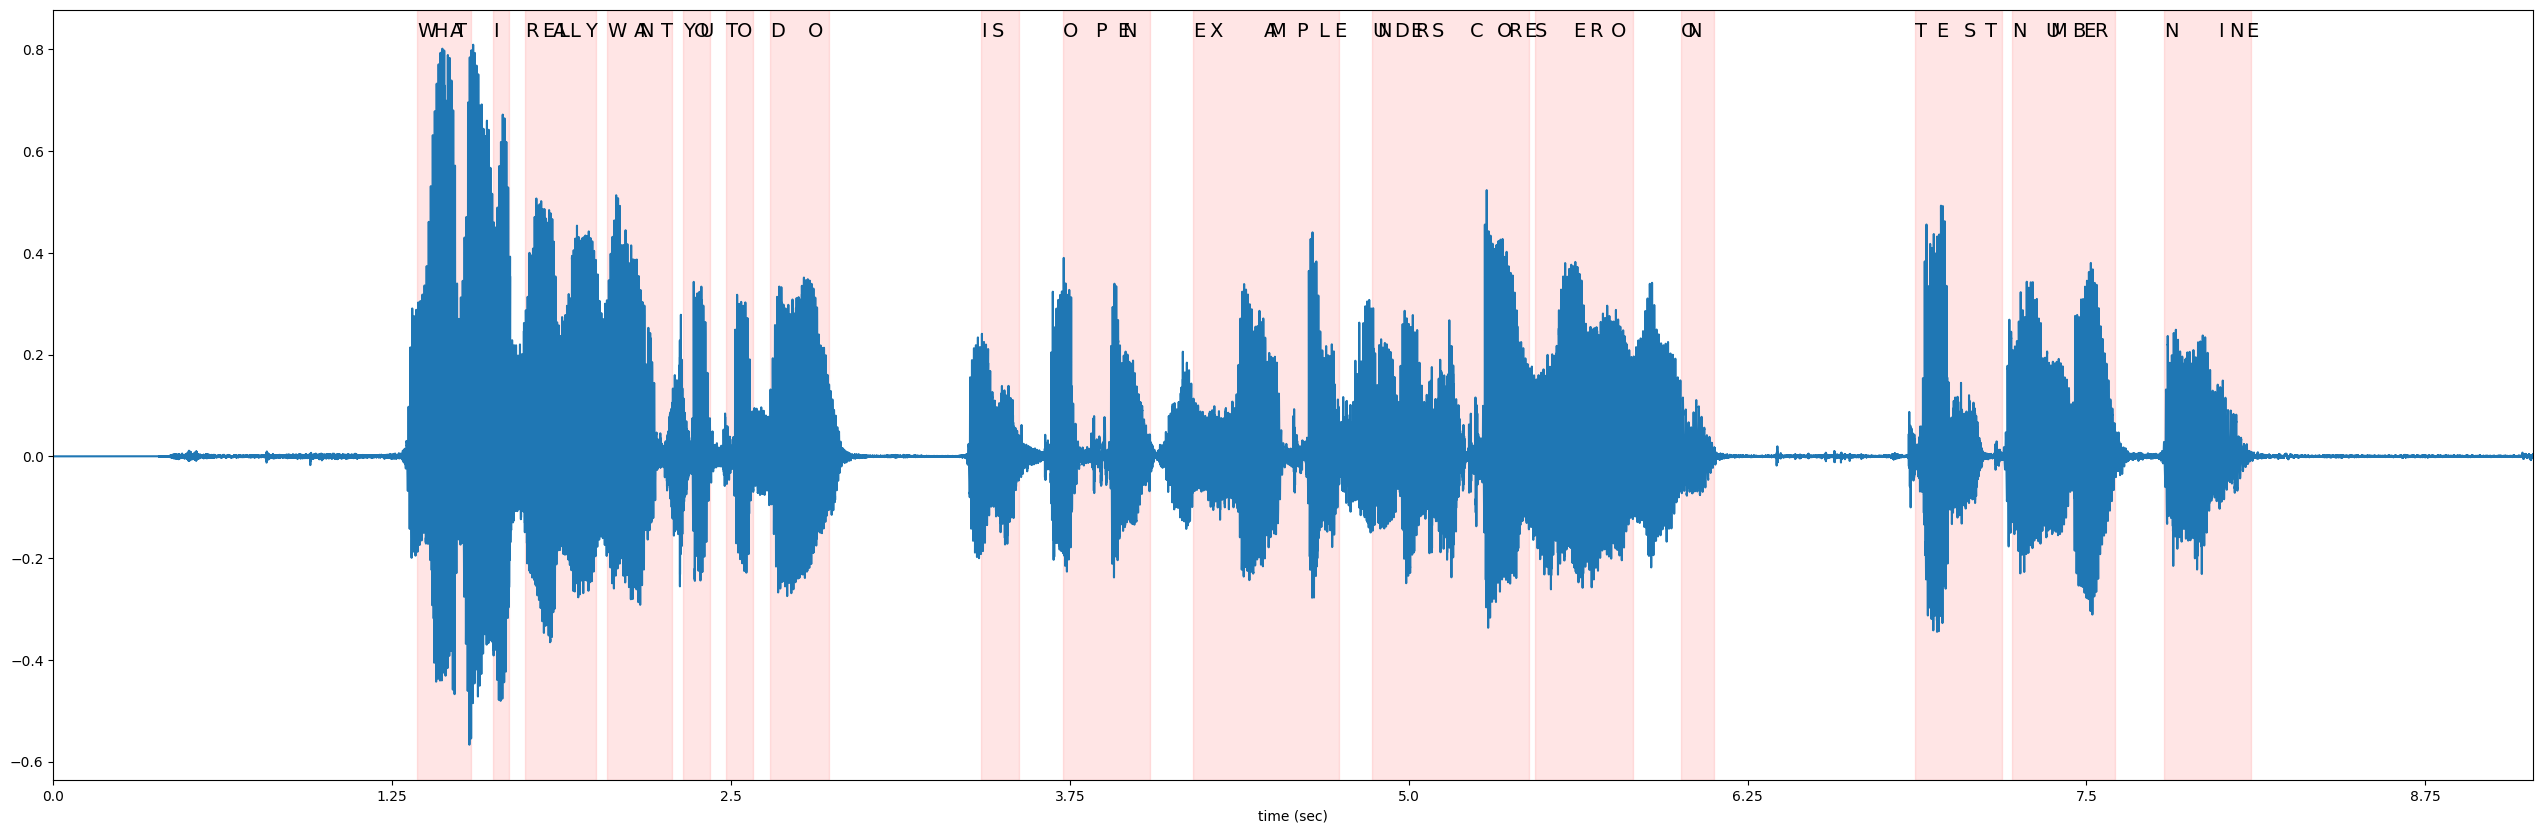

In [16]:
def plot_alignments(waveform, emission, tokens, timesteps):
    fig, ax = plt.subplots(figsize=(32, 10))

    ax.plot(waveform)

    ratio = waveform.shape[0] / emission.shape[1]
    word_start = 0

    for i in range(len(tokens)):
        if i != 0 and tokens[i - 1] == "|":
            word_start = timesteps[i]
        if tokens[i] != "|":
            plt.annotate(tokens[i].upper(), (timesteps[i] * ratio, waveform.max() * 1.02), size=14)
        elif i != 0:
            word_end = timesteps[i]
            ax.axvspan(word_start * ratio, word_end * ratio, alpha=0.1, color="red")

    xticks = ax.get_xticks()
    plt.xticks(xticks, xticks / bundle.sample_rate)
    ax.set_xlabel("time (sec)")
    ax.set_xlim(0, waveform.shape[0])


plot_alignments(waveform[0], emission, predicted_tokens, timesteps)

In [47]:
def print_decoded(decoder, emission, param, param_value):
    start_time = time.monotonic()
    result = decoder(emission)
    decode_time = time.monotonic() - start_time

    transcript = " ".join(result[0][0].words).lower().strip()
    score = result[0][0].score
    print(f"{param} {param_value:<3}: {transcript} (score: {score:.2f}; {decode_time:.4f} secs)")

In [48]:
for i in range(3):
    transcript = " ".join(beam_search_result[0][i].words).strip()
    score = beam_search_result[0][i].score
    print(f"{transcript} (score: {score})")

i loved but to die (score: 1397.510836699009)
i loved but today (score: 1396.1081490719316)
i loved but to day (score: 1396.0091697835924)


In [49]:
beam_sizes = [1, 5, 50, 500]

for beam_size in beam_sizes:
    beam_search_decoder = ctc_decoder(
        lexicon=files.lexicon,
        tokens=files.tokens,
        lm=files.lm,
        beam_size=beam_size,
        lm_weight=LM_WEIGHT,
        word_score=WORD_SCORE,
    )

    print_decoded(beam_search_decoder, emission, "beam size", beam_size)

beam size 1  : i but (score: 1309.12; 0.0904 secs)
beam size 5  : i loved but to (score: 1383.70; 0.0069 secs)
beam size 50 : i loved but to die (score: 1396.42; 0.0677 secs)
beam size 500: i loved but to die (score: 1397.51; 2.8747 secs)


In [50]:
num_tokens = len(tokens)
beam_size_tokens = [1, 5, 10, num_tokens]

for beam_size_token in beam_size_tokens:
    beam_search_decoder = ctc_decoder(
        lexicon=files.lexicon,
        tokens=files.tokens,
        lm=files.lm,
        beam_size_token=beam_size_token,
        lm_weight=LM_WEIGHT,
        word_score=WORD_SCORE,
    )

    print_decoded(beam_search_decoder, emission, "beam size token", beam_size_token)

beam size token 1  : i loved but tod (score: 1387.61; 2.2201 secs)
beam size token 5  : i loved but to die (score: 1397.51; 2.4949 secs)
beam size token 10 : i loved but to die (score: 1397.51; 0.0311 secs)
beam size token 29 : i loved but to die (score: 1396.42; 2.2950 secs)


In [51]:
beam_thresholds = [1, 5, 10, 25]

for beam_threshold in beam_thresholds:
    beam_search_decoder = ctc_decoder(
        lexicon=files.lexicon,
        tokens=files.tokens,
        lm=files.lm,
        beam_threshold=beam_threshold,
        lm_weight=LM_WEIGHT,
        word_score=WORD_SCORE,
    )

    print_decoded(beam_search_decoder, emission, "beam threshold", beam_threshold)

beam threshold 1  : i (score: 1287.69; 0.0014 secs)
beam threshold 5  : i loved but today (score: 1392.90; 2.0309 secs)
beam threshold 10 : i loved but to die (score: 1396.42; 0.0092 secs)
beam threshold 25 : i loved but to die (score: 1396.42; 2.0471 secs)
